In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd

In [2]:
X, y = make_blobs(n_samples = 500
                 ,n_features = 2
                 ,centers = 4
                 ,random_state = 2)

In [3]:
n_clusters = 4

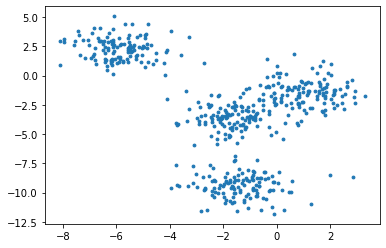

In [4]:
fig, ax = plt.subplots(1)
ax.scatter(X[:,0],X[:,1]
          ,marker = 'o'
          ,s = 8)
plt.show()

In [5]:
cluster = KMeans(n_clusters = n_clusters, random_state = 10).fit(X)

In [6]:
y_pred = cluster.labels_

In [7]:
silhouette_score(X,y_pred)

0.6250462156493074

In [8]:
axvline = silhouette_score(X,y_pred)

In [9]:
silhouette_samples(X,y_pred).shape

(500,)

In [10]:
s = silhouette_samples(X,y_pred)

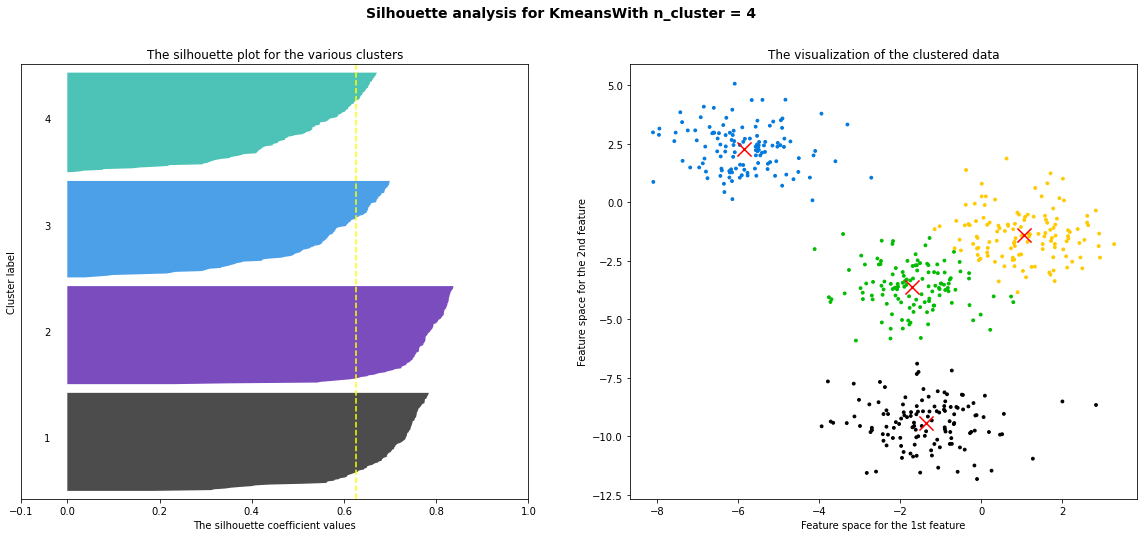

In [11]:
#创建两个子图
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(20,8)
ax1.set_xlim([-0.1,1])
ax1.set_ylim([0,X.shape[0] + 50])
#左图为轮廓系数在各个簇的表现
y_low = 10
for i in range(n_clusters):
    #取出轮廓系数的数据集并进行排序
    cs = s[y_pred == i]
    cs.sort()
    scs = cs.shape[0]
    y_up = y_low + scs
    
    color = cm.nipy_spectral(float(i)/n_clusters*0.5)
    
    ax1.fill_betweenx(np.arange(y_low,y_up)
                     ,cs
                     ,facecolor = color
                     ,alpha = 0.7
                     )
    
    ax1.text(-0.05,y_low + 0.5*scs,i+1)
    y_low = y_up + 10

ax1.set_title("The silhouette plot for the various clusters")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

ax1.axvline(x = silhouette_score(X,y_pred),color = "yellow",linestyle = "--")
ax1.set_yticks([])
ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])

#右图为Kmeans后的样本分布
colors = cm.nipy_spectral(y_pred.astype(float)/n_clusters)

ax2.scatter(X[:,0]
           ,X[:,1]
           ,marker = 'o'
           ,s = 8
           ,c = colors
           )

center = cluster.cluster_centers_

ax2.scatter(center[:,0]
           ,center[:,1]
           ,marker = 'x'
           ,c = 'red'
           ,alpha = 1
           ,s = 200
           )

ax2.set_title("The visualization of the clustered data")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")
#整个图设置标题
plt.suptitle(("Silhouette analysis for Kmeans"
            "With n_cluster = %d" % n_clusters)
            ,fontsize = 14
            ,fontweight = 'bold')#粗体
plt.show()

In [12]:
cluster. n_iter_

4

In [13]:
plus = KMeans(n_clusters = n_clusters, init = 'random', random_state = 10).fit(X)

In [14]:
plus.n_iter_

6

In [15]:
from sklearn.cluster import k_means

In [16]:
k_means(X,4,return_n_iter = True)

(array([[ 1.06217703, -1.38625425],
        [-1.35908033, -9.4211665 ],
        [-1.70173356, -3.61602309],
        [-5.86450362,  2.29036425]]),
 array([1, 3, 1, 2, 3, 2, 0, 0, 0, 2, 0, 2, 0, 2, 3, 0, 2, 1, 3, 2, 3, 1,
        2, 0, 1, 1, 0, 2, 0, 1, 1, 2, 0, 0, 3, 3, 0, 0, 2, 1, 2, 3, 0, 2,
        3, 1, 1, 1, 3, 0, 1, 1, 2, 0, 1, 3, 2, 1, 0, 0, 0, 3, 3, 1, 0, 2,
        1, 2, 1, 1, 3, 2, 1, 2, 2, 1, 0, 2, 0, 1, 3, 3, 2, 3, 0, 2, 3, 2,
        3, 2, 1, 2, 1, 3, 0, 0, 3, 3, 3, 2, 2, 1, 0, 0, 1, 3, 0, 3, 1, 1,
        1, 1, 0, 0, 1, 0, 3, 1, 0, 1, 1, 0, 1, 3, 3, 0, 0, 1, 1, 1, 2, 1,
        0, 0, 3, 1, 0, 3, 2, 1, 0, 1, 0, 0, 1, 3, 0, 1, 1, 1, 0, 2, 2, 3,
        2, 3, 1, 3, 1, 2, 3, 2, 3, 0, 1, 0, 2, 1, 1, 3, 1, 3, 0, 3, 1, 1,
        3, 2, 1, 2, 3, 2, 0, 3, 0, 3, 3, 0, 2, 3, 2, 3, 3, 0, 2, 0, 0, 1,
        0, 0, 1, 2, 1, 3, 3, 3, 2, 1, 2, 1, 3, 2, 0, 1, 0, 2, 1, 2, 0, 1,
        3, 1, 2, 3, 1, 2, 2, 2, 1, 1, 3, 3, 3, 1, 3, 1, 3, 0, 2, 1, 0, 1,
        2, 2, 2, 3, 3, 0, 2, 2, 1, 1, 2,

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image #图片数据所用类
from sklearn.metrics import pairwise_distances_argmin #对两个序列中的点进行距离匹配
from sklearn.utils import shuffle

img = load_sample_image("china.jpg")

newimg = img.reshape((427 * 640), 3)

In [18]:
n_clusters = 100

img = np.array(img, dtype = np.float64) / img.max()

w, h, d = img.shape
img_array = np.reshape(img, ((w * h), d))
assert d == 3

img_array_sample = shuffle(img_array, random_state = 0)[:1000]
kmeans = KMeans(n_clusters = n_clusters,random_state = 0).fit(img_array_sample)

labels = kmeans.predict(img_array)

img_kmeans = img_array.copy()

for i in range(w * h):
    img_kmeans[i] = kmeans.cluster_centers_[labels[i]]

img_kmeans = np.reshape(img_kmeans, (w, h, d))

In [19]:
center_random = shuffle(img_array, random_state = 0)[:n_clusters]
labels_random = pairwise_distances_argmin(center_random, img_array, axis = 0)

img_random = img_array.copy()

for i in range(w * h):
    img_random[i] = center_random[labels_random[i]]
    
img_random = np.reshape(img_random, (w, h, d))

Text(0.5, 1.0, 'Random')

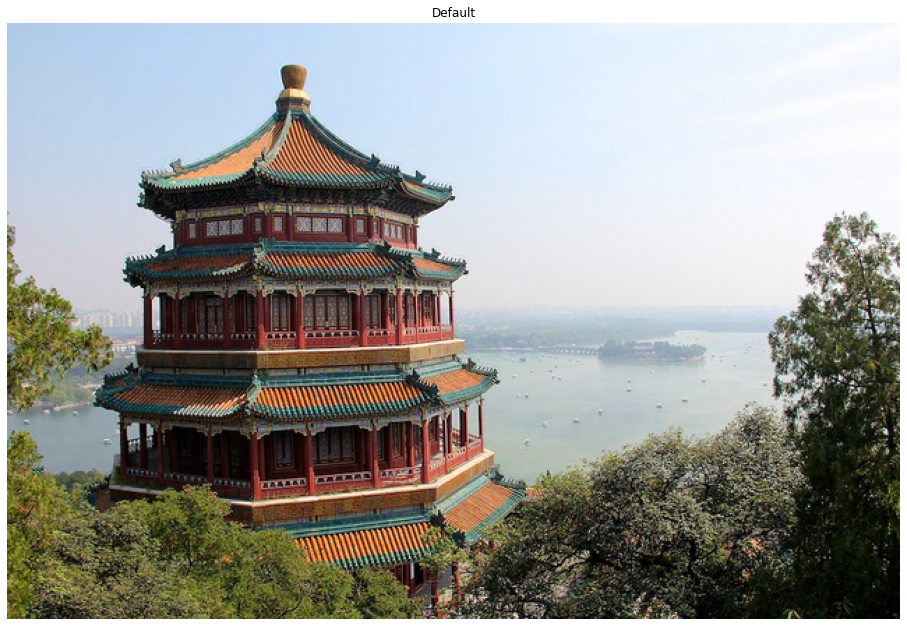

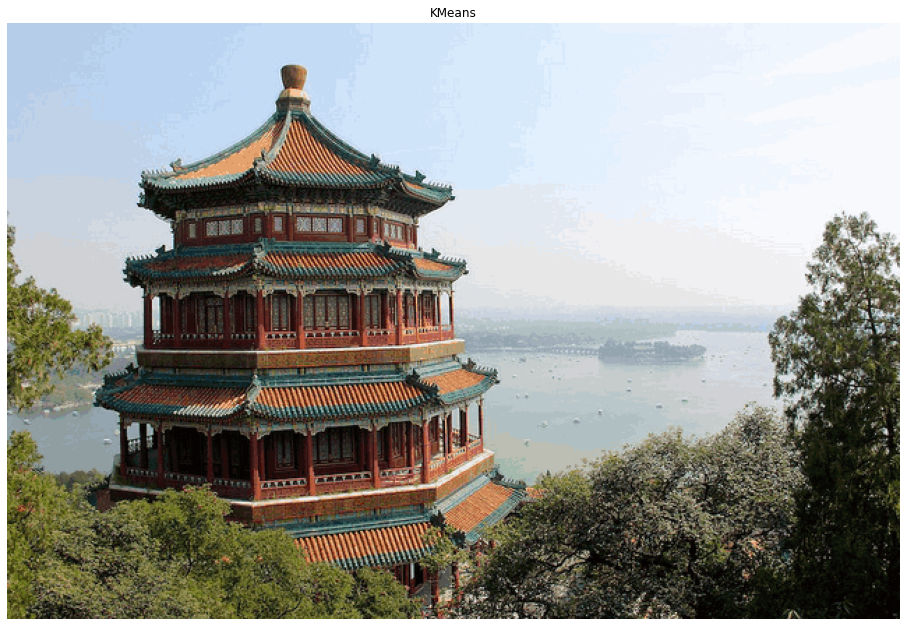

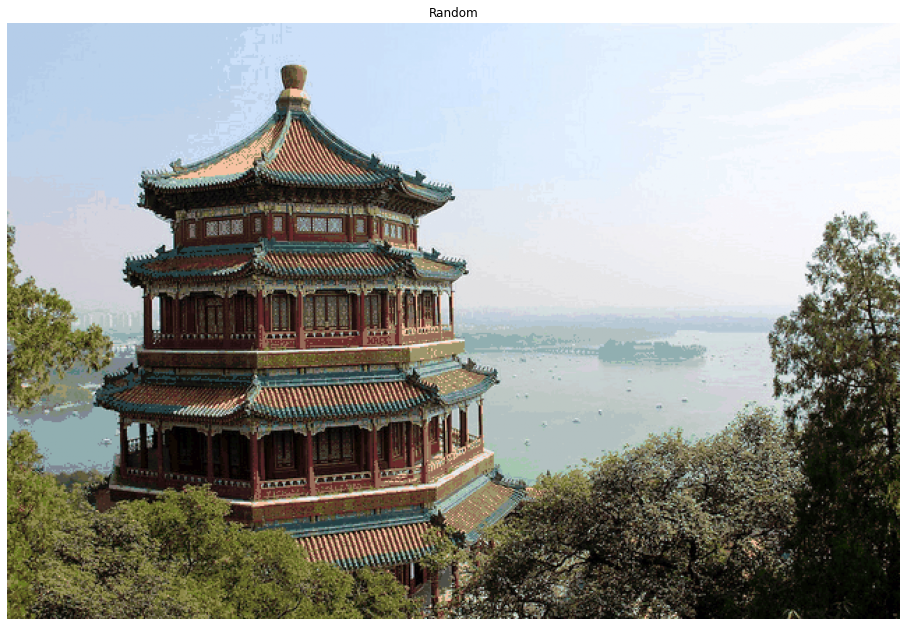

In [20]:
plt.figure(figsize=(16,16))
plt.axis("off")
plt.imshow(img)
plt.title("Default")

plt.figure(figsize = (16,16))
plt.axis("off")
plt.imshow(img_kmeans)
plt.title("KMeans")

plt.figure(figsize = (16, 16))
plt.axis("off")
plt.imshow(img_random)
plt.title("Random")

In [21]:
()

()